In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
import time
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30

5745.32815694809


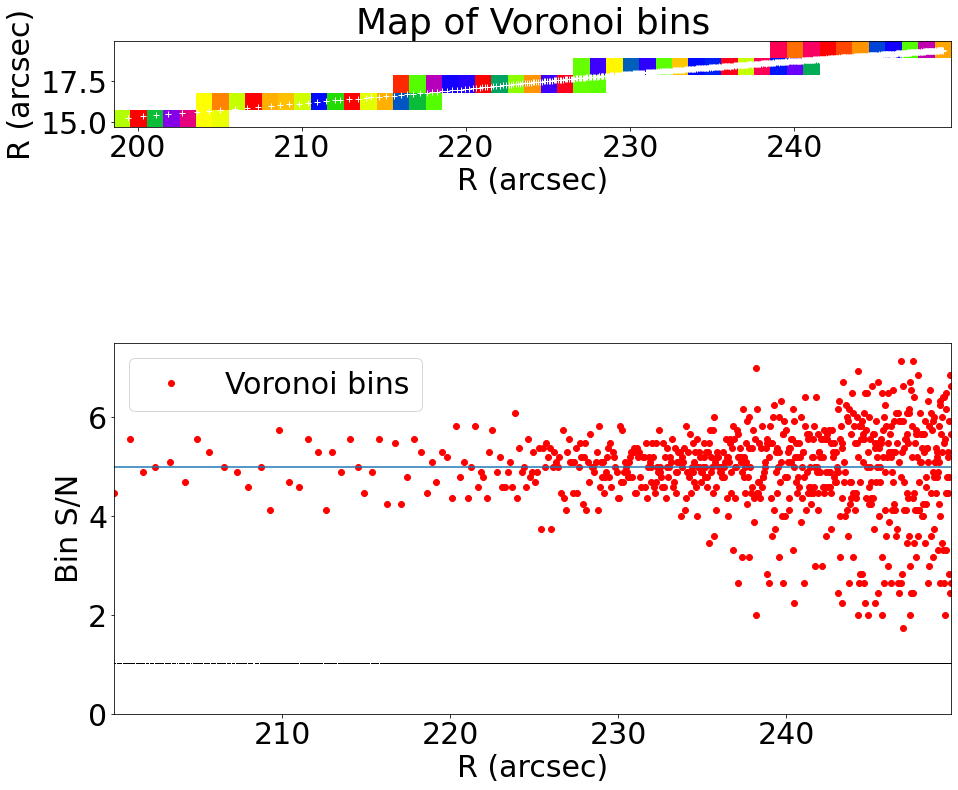

In [7]:
#code in one piece
#read observation data
#os.chdir('C:/Users/marti/Desktop/share/dm_test')
os.chdir('C:/Users/marti/Desktop/school work/Dartmouth/M92 project/M92-20211208T215351Z-001/M92/ObservationalData')
dp = pd.read_csv('M92_fitstars.dat',sep='\s+',names=['v','i','vi'],skiprows=3)
y = dp['v'].values
x = dp['vi'].values*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x, y, xBar, yBar)
for i in range(len(x)):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dms = np.linspace(14.70,14.90,21)
reds = np.linspace(0.0,0.05,11)
#ages = ['09000']
chi2 = []
for dm in dms:
    for red in reds:
        dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
        bin_count = np.zeros(len(xBar))
        total_pt = len(dp)
        n_div = total_pt // 500000
        for i in range(n_div):
            bin_num = search_point_location_bc((dp['vi'].values[i*500000:(i+1)*500000] + red)*12.5, dp['v'].values[i*500000:(i+1)*500000] + dm, xBar, yBar)
            for j in range(500000):
                bin_count[bin_num[j]] += 1
#do the last bit
        bin_num = search_point_location_bc((dp['vi'].values[n_div*500000:] + red)*12.5, dp['v'].values[n_div*500000:] + dm, xBar, yBar)
        for j in range(total_pt - n_div*500000):
            bin_count[bin_num[j]] += 1
        density = bin_count/total_pt
        chi2.append([dm, red, np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std)])
end = time.time()
print(end - start)

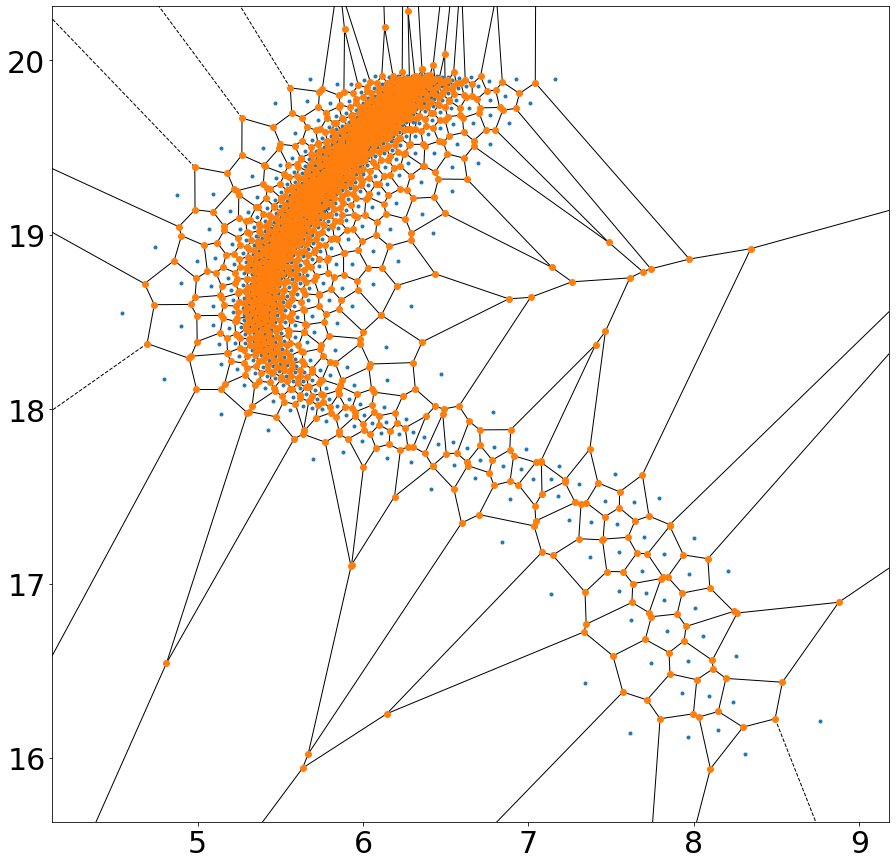

In [39]:
points = np.stack((xBar, yBar), axis=1)
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [8]:
chi2

[[14.7, 0.0, 9790077.0],
 [14.7, 0.005, 9790077.0],
 [14.7, 0.01, 9790077.0],
 [14.7, 0.015, 9790077.0],
 [14.7, 0.02, 9790077.0],
 [14.7, 0.025, 9790077.0],
 [14.7, 0.03, 9790077.0],
 [14.7, 0.035, 9790077.0],
 [14.7, 0.04, 9790077.0],
 [14.7, 0.045, 9790077.0],
 [14.7, 0.05, 9790077.0],
 [14.709999999999999, 0.0, 9790077.0],
 [14.709999999999999, 0.005, 9790077.0],
 [14.709999999999999, 0.01, 9790077.0],
 [14.709999999999999, 0.015, 9790077.0],
 [14.709999999999999, 0.02, 9790077.0],
 [14.709999999999999, 0.025, 9790077.0],
 [14.709999999999999, 0.03, 9790077.0],
 [14.709999999999999, 0.035, 9790077.0],
 [14.709999999999999, 0.04, 9790077.0],
 [14.709999999999999, 0.045, 9790077.0],
 [14.709999999999999, 0.05, 9790077.0],
 [14.719999999999999, 0.0, 9790077.0],
 [14.719999999999999, 0.005, 9790077.0],
 [14.719999999999999, 0.01, 9790077.0],
 [14.719999999999999, 0.015, 9790077.0],
 [14.719999999999999, 0.02, 9790077.0],
 [14.719999999999999, 0.025, 9790077.0],
 [14.719999999999999, 0.

In [24]:
#code in one piece
#read observation data
#os.chdir('C:/Users/marti/Desktop/share/dm_test')
os.chdir('C:/Users/marti/Desktop/school work/Dartmouth/M92 project/M92-20211208T215351Z-001/M92/ObservationalData')
dp = pd.read_csv('M92_fitstars.dat',sep='\s+',names=['v','i','vi'],skiprows=3)
y = dp['v'].values
x = dp['vi'].values*12.5
obs_size = len(x)

signal = np.array([1]*obs_size)
noise = np.array([1]*obs_size)
#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=0, quiet=1)
#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x, y, xBar, yBar)
for i in range(obs_size):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
os.chdir('C:/Users/marti/Desktop/share/dm_test')
Tb_size = 50000
dms = np.linspace(14.70,14.90,21)
reds = np.linspace(0.0,0.05,11)
#ages = ['09000']
chi2 = []
for dm in dms:
    for red in reds:
        dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
        bin_count = np.zeros(len(xBar))
        total_pt = len(dp)
        n_div = total_pt // Tb_size
        for i in range(n_div):
            bin_num = search_point_location_bc((dp['vi'].values[i*Tb_size:(i+1)*Tb_size] + red)*12.5, dp['v'].values[i*Tb_size:(i+1)*Tb_size] + dm, xBar, yBar)
            for j in range(Tb_size):
                bin_count[bin_num[j]] += 1
#do the last bit
        bin_num = search_point_location_bc((dp['vi'].values[n_div*Tb_size:] + red)*12.5, dp['v'].values[n_div*Tb_size:] + dm, xBar, yBar)
        for j in range(total_pt - n_div*Tb_size):
            bin_count[bin_num[j]] += 1
        density = bin_count/total_pt
        chi2.append([dm, red, np.inner(np.divide(density*obs_size,bin_count_std) - 1, density*obs_size - bin_count_std)])
end = time.time()
print(end - start)

6068.6778082847595


In [19]:
[i[0] for i in chi2]

[14.7, 14.7, 14.7, 14.8, 14.8, 14.8, 14.9, 14.9, 14.9]

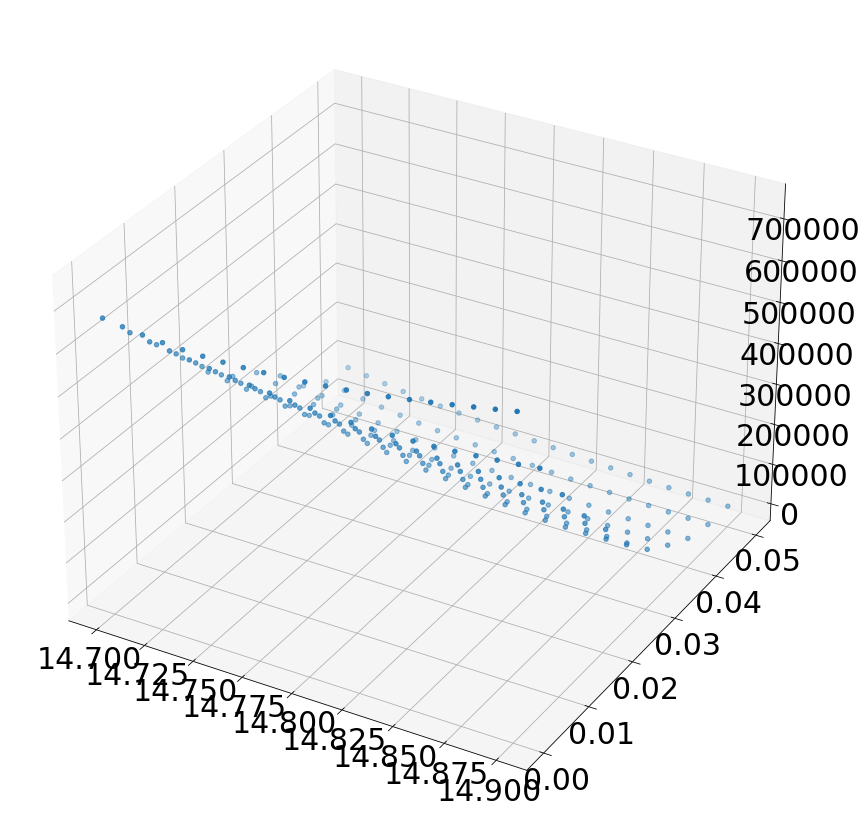

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D([i[0] for i in chi2],[i[1] for i in chi2],[i[2] for i in chi2])
plt.show()

In [27]:
chi2_mc10000_a11000 = chi2

In [44]:
#code in one piece
#read observation data
#os.chdir('C:/Users/marti/Desktop/share/dm_test')
os.chdir('C:/Users/marti/Desktop/school work/Dartmouth/M92 project/M92-20211208T215351Z-001/M92/ObservationalData')
dp = pd.read_csv('M92_fitstars.dat',sep='\s+',names=['v','i','vi'],skiprows=3)
y = dp['v'].values
x = dp['vi'].values*12.5
obs_size = len(x)

signal = np.array([1]*obs_size)
noise = np.array([1]*obs_size)
#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=0, quiet=1)
#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x, y, xBar, yBar)
for i in range(obs_size):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
os.chdir('C:/Users/marti/Desktop/share/dm_test')
Tb_size = 50000
dms = np.linspace(14.70,14.90,21)
reds = np.linspace(0.0,0.05,11)
ages = ['09000','10000','11000','12000','13000','14000','15000','16000']
chi2 = []
for age in ages:
    dp = pd.read_csv('mc10000.a{}'.format(age),sep='\s+',names=['vi','v','i'],skiprows=3)
    for dm in dms:
        for red in reds:
            bin_count = np.zeros(len(xBar))
            total_pt = len(dp)
            n_div = total_pt // Tb_size
            for i in range(n_div):
                bin_num = search_point_location_bc((dp['vi'].values[i*Tb_size:(i+1)*Tb_size] + red)*12.5, dp['v'].values[i*Tb_size:(i+1)*Tb_size] + dm, xBar, yBar)
                for j in range(Tb_size):
                    bin_count[bin_num[j]] += 1
#do the last bit
            bin_num = search_point_location_bc((dp['vi'].values[n_div*Tb_size:] + red)*12.5, dp['v'].values[n_div*Tb_size:] + dm, xBar, yBar)
            for j in range(total_pt - n_div*Tb_size):
                bin_count[bin_num[j]] += 1
            density = bin_count/total_pt
            chi2.append([age, dm, red, np.inner(np.divide(density*obs_size,bin_count_std) - 1, density*obs_size - bin_count_std)])
end = time.time()
print(end - start)

38175.20884799957


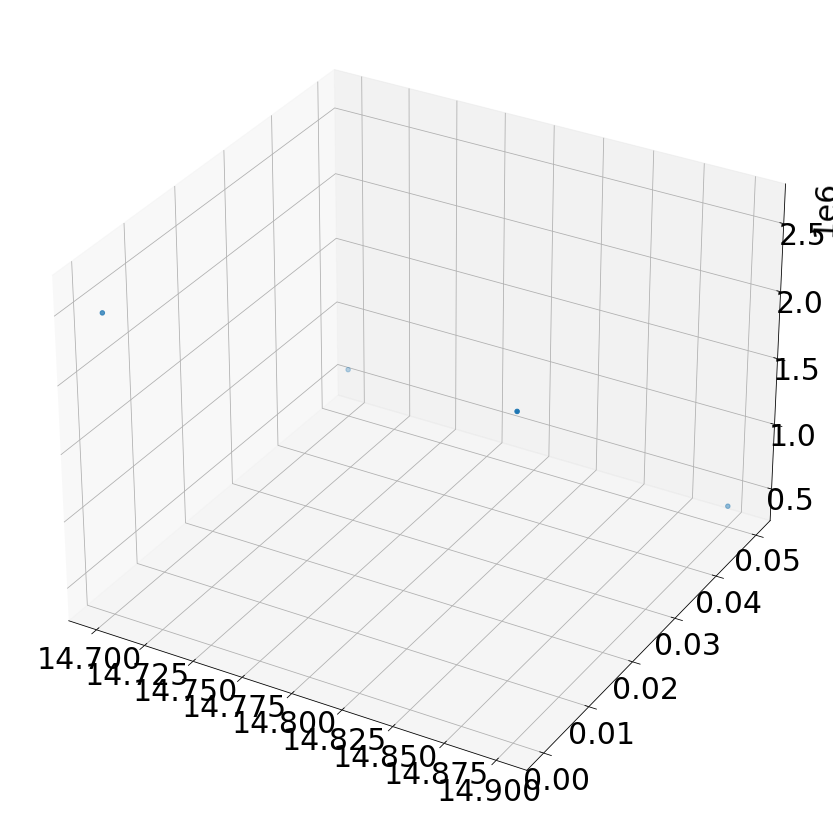

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D([i[0] for i in chi2],[i[1] for i in chi2],[i[2] for i in chi2])
plt.show() 

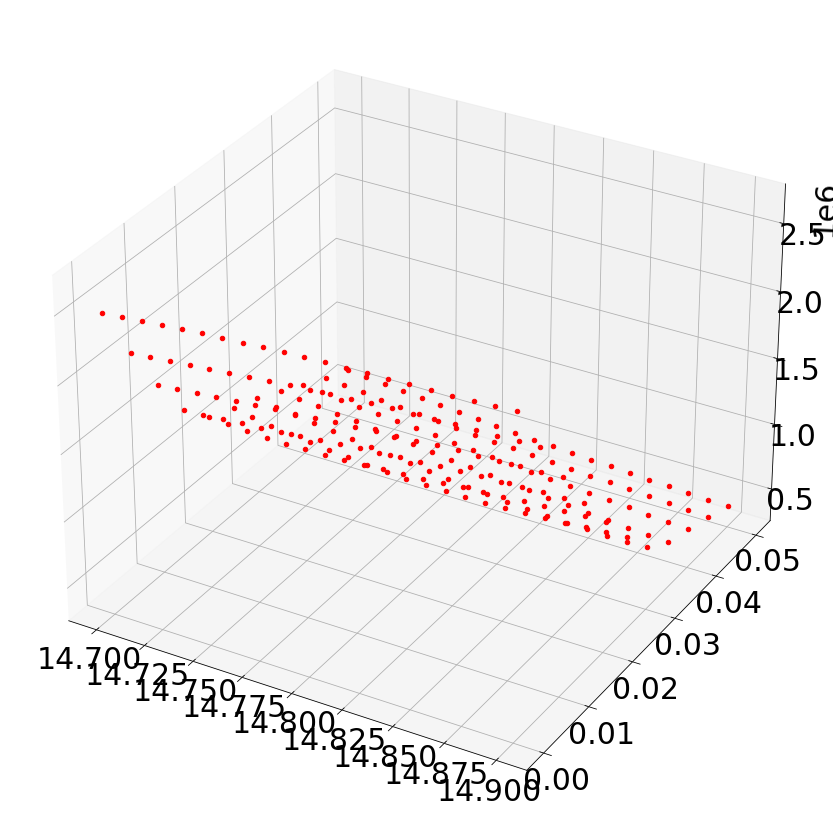

In [52]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in chi2:
    if i[0] == '09000':
        ax.scatter3D(i[1],i[2],i[3],c='r')
plt.show() 

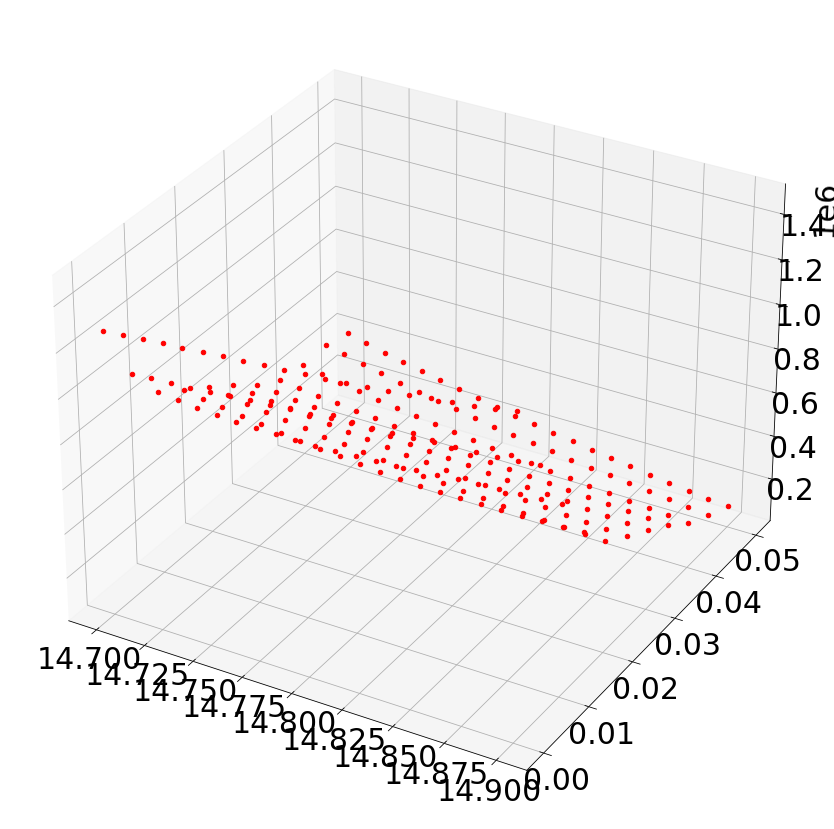

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in chi2:
    if i[0] == '10000':
        ax.scatter3D(i[1],i[2],i[3],c='r')
plt.show() 

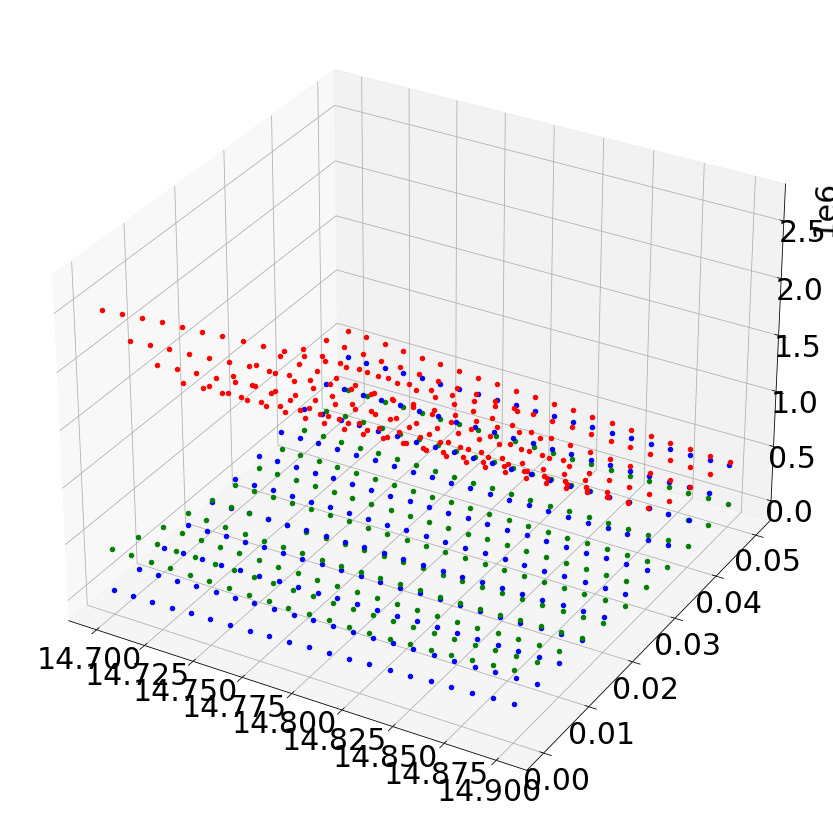

In [54]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in chi2:
    if i[0] == '09000':
        ax.scatter3D(i[1],i[2],i[3],c='r')
for i in chi2:
    if i[0] == '12000':
        ax.scatter3D(i[1],i[2],i[3],c='g')
for i in chi2:
    if i[0] == '16000':
        ax.scatter3D(i[1],i[2],i[3],c='b')
plt.show() 

In [55]:
minchi = np.inf
for i in range(len(chi2)):
    if chi2[i][3] < minchi:
        minchi = chi2[i][3]
        idx = i
chi2[idx]

['13000', 14.76, 0.025, 7029.058644182579]

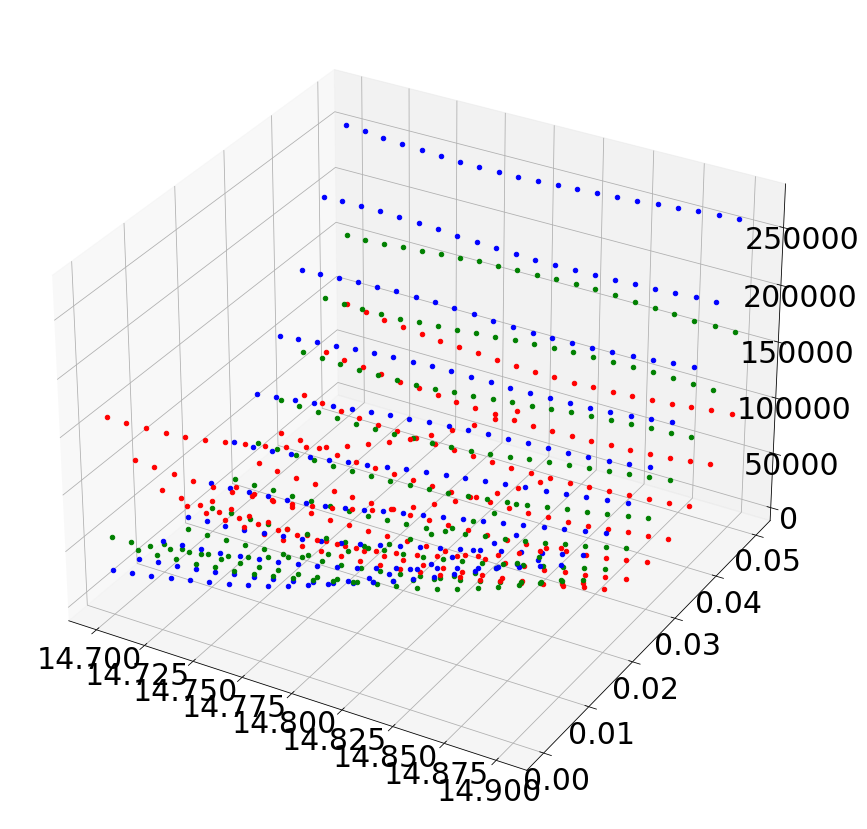

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in chi2:
    if i[0] == '13000':
        ax.scatter3D(i[1],i[2],i[3],c='r')
for i in chi2:
    if i[0] == '14000':
        ax.scatter3D(i[1],i[2],i[3],c='g')
for i in chi2:
    if i[0] == '15000':
        ax.scatter3D(i[1],i[2],i[3],c='b')
plt.show() 